# CHE 1148 Assignment 4
## 1. Data quality  -DFT error estimation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

### Import the data - Extract X and y (y: the last column of the table)

In [2]:
X_y = pd.read_excel('data.xlsx', index_col=None, header=None)
X = X_y.drop([713], axis = 1)
y = X_y[713]
X.shape

(1676, 713)

### Explore the inputs X (1676 rows; 713 columns)

In [8]:
X

,0,1,2,3,4,5,6,7,8,9,...,703,704,705,706,707,708,709,710,711,712
0,0,10,0,0,13,0,0,0,0,0,...,0,0,0,0,0,9,16,0,0,0
1,2,2,0,3,0,0,0,1,1,0,...,0,0,0,0,0,5,3,4,1,0
2,0,8,0,0,10,0,0,0,0,0,...,0,0,0,0,0,8,15,0,1,0
3,6,19,0,14,22,0,8,6,8,0,...,0,0,0,0,0,22,26,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,0,9,1,0,8,1,0,0,0,0,...,0,0,0,0,0,10,19,0,1,0
1672,0,4,0,0,6,0,0,0,0,0,...,0,0,0,0,0,7,12,4,0,0
1673,3,11,0,10,12,0,8,3,8,0,...,0,0,0,0,0,13,18,0,0,0
1674,1,5,0,2,3,0,2,0,1,0,...,0,0,0,0,0,7,14,0,0,0


### What is the percentage of non-zero elements in table X
* Notice that the features are already imputed with zero values when a subgroup is absent.
* Calculate the completeness as the percentage of non-zero elements per column.

#### The input is sparse. Let's plot the sparsity pattern (spy plot: blue $\neq$ 0, white = 0)

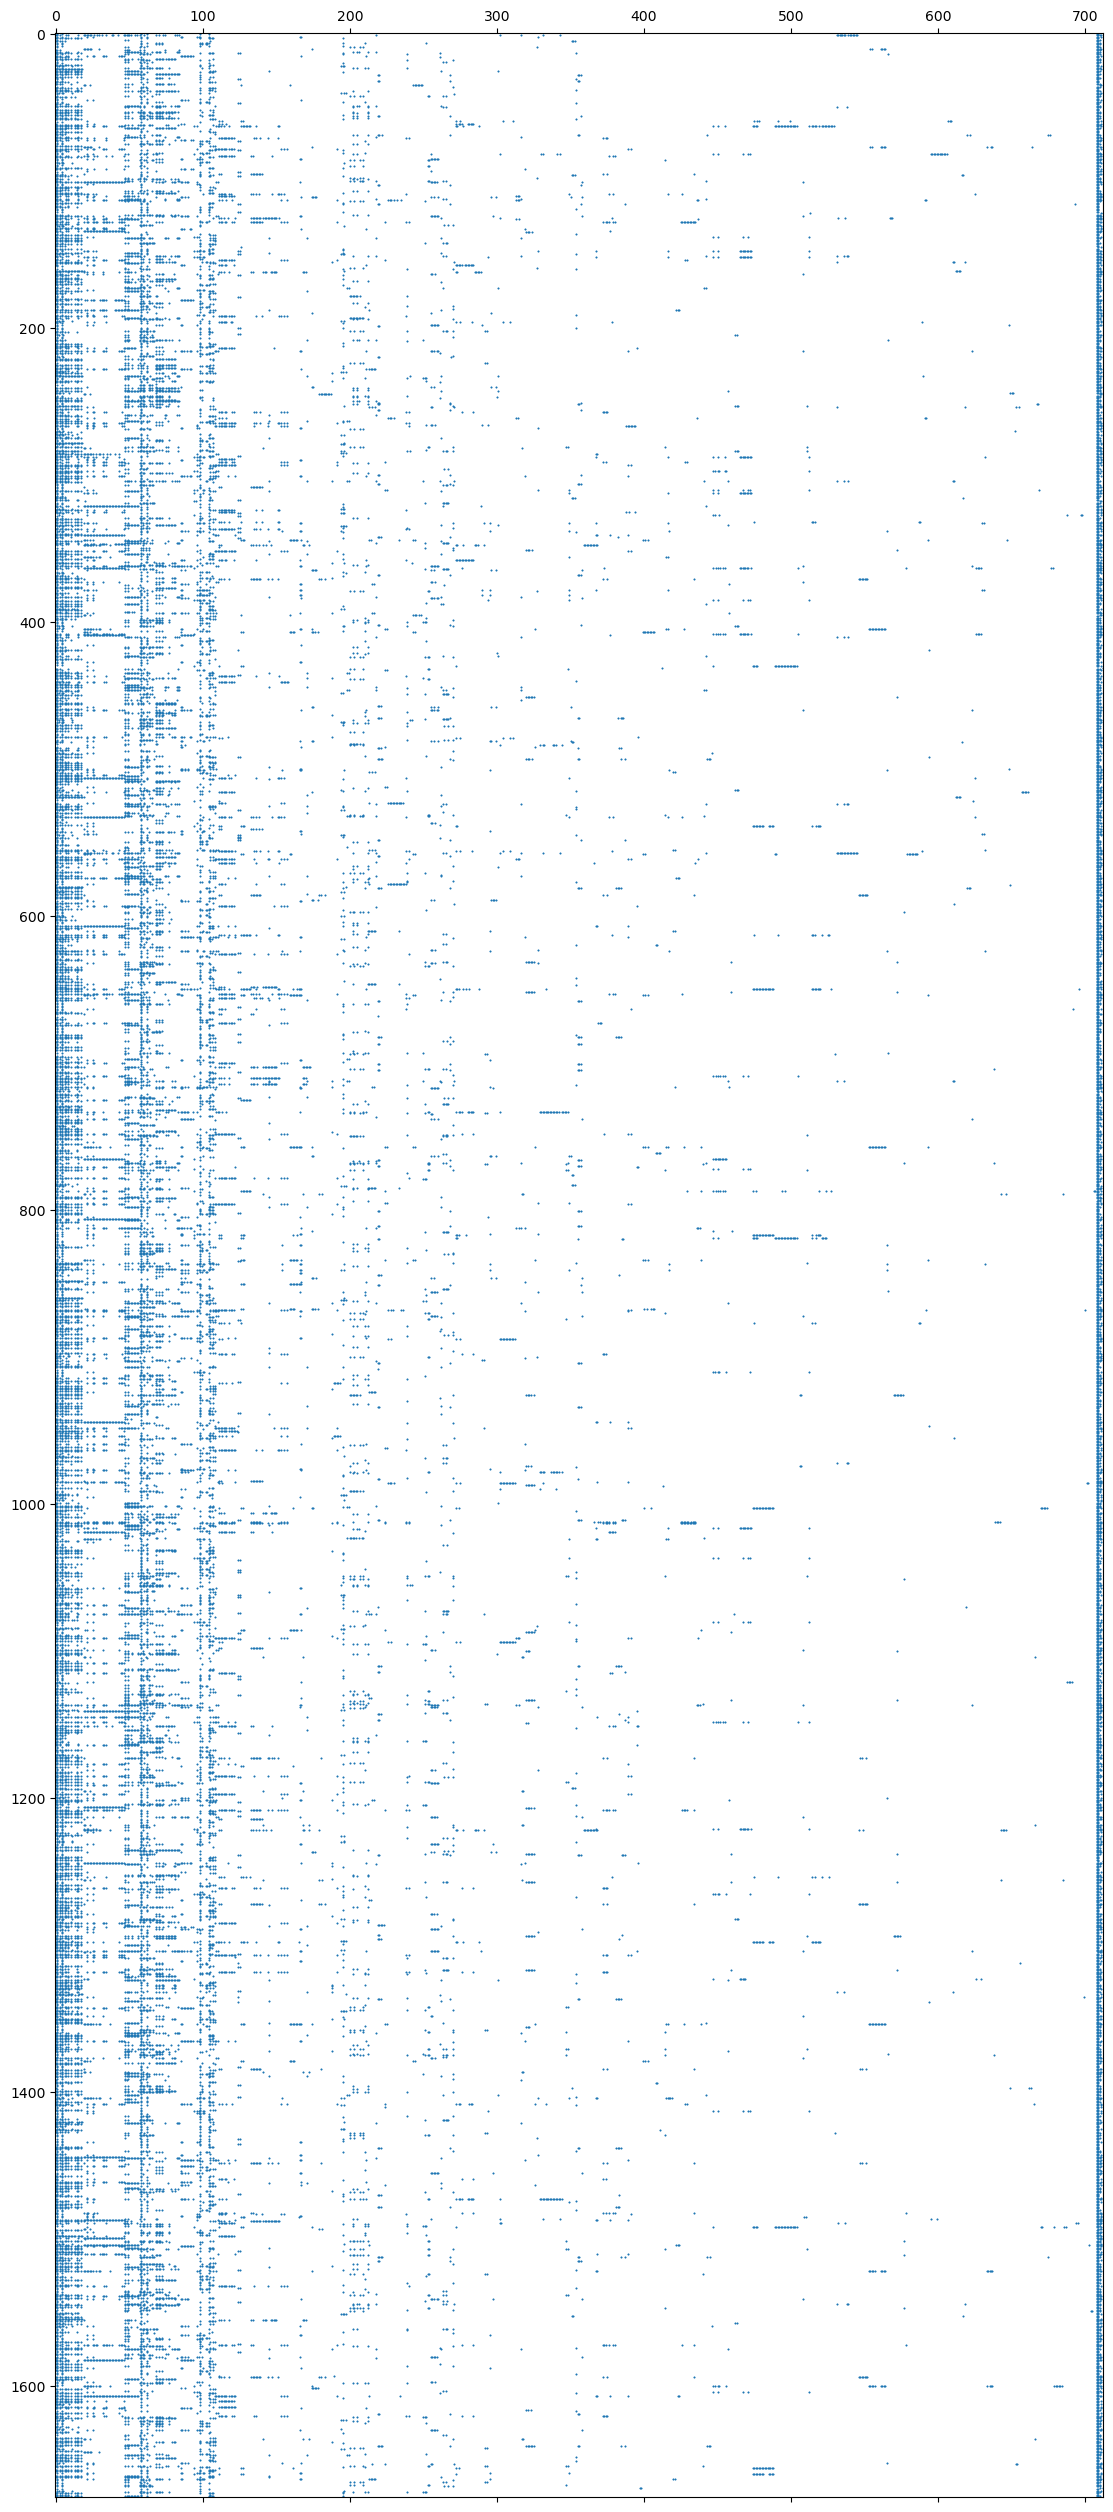

In [3]:
plt.figure(figsize=(20, 32))
plt.spy(X, precision=0, markersize=0.5)
plt.show()

In [4]:
print("The percentage of non-zero elements in X is: {:.2f} %"
      .format(np.count_nonzero(X) / X.size * 100))

The percentage of non-zero elements in X is: 2.98 %


In [20]:
completeness = ((X != 0).astype(int).sum(axis=0)/ X.shape[0])*100
completeness

0      50.238663
1      94.988067
2       5.906921
3      49.045346
4      81.384248
         ...    
708    99.105012
709    98.985680
710    51.073986
711    28.281623
712     0.298329
Length: 713, dtype: float64

### Create a Ridge regression model ($L_2$ regularization)

In [21]:
Ridge_L2 = linear_model.Ridge(alpha=2)
Ridge_L2.fit(X, y)

Ridge(alpha=2)

### Create the completeness-feature importance graph.
*  Make sure that appropriate scaling of the axis is used for the best visualization and interpretation (e.g. loglog or semi-log axis)
#### Calculate feature importance first

In [22]:
fea_importance= abs(Ridge_L2.coef_)

array([1.45535454e+01, 8.77746464e+00, 1.72434380e+01, 1.32181883e+01,
       1.27982442e+01, 1.42058867e+01, 1.35800065e+00, 3.02668373e+00,
       3.26493360e-01, 3.99173821e+00, 1.42271497e+01, 1.38774218e+01,
       1.17493799e+01, 1.46230035e+00, 5.26807823e-01, 4.71982234e-01,
       6.50012043e+00, 9.24842244e-01, 3.02961852e+00, 4.41784620e+00,
       2.16945484e-01, 1.41628200e+01, 1.69842676e+00, 1.59626682e+00,
       8.29838270e+00, 7.49817608e-01, 1.94334572e+00, 9.77620956e-01,
       3.58342169e-01, 1.25537799e+00, 6.44124318e+00, 4.02992484e+00,
       1.70593786e+00, 2.78582852e+00, 3.20242685e+00, 5.37033794e-02,
       2.11655632e+00, 6.01761526e-01, 5.49477145e-01, 3.01307987e+00,
       4.26080373e+00, 3.28701863e+00, 1.17456764e+00, 2.22288694e+00,
       1.46674323e+00, 1.22702866e+00, 1.55352183e+00, 2.30188855e+00,
       7.64982833e+00, 6.20990061e+00, 2.31980040e+00, 1.42437546e+00,
       7.76786014e-01, 6.20010816e+00, 2.79178467e+00, 2.06197743e-01,
      

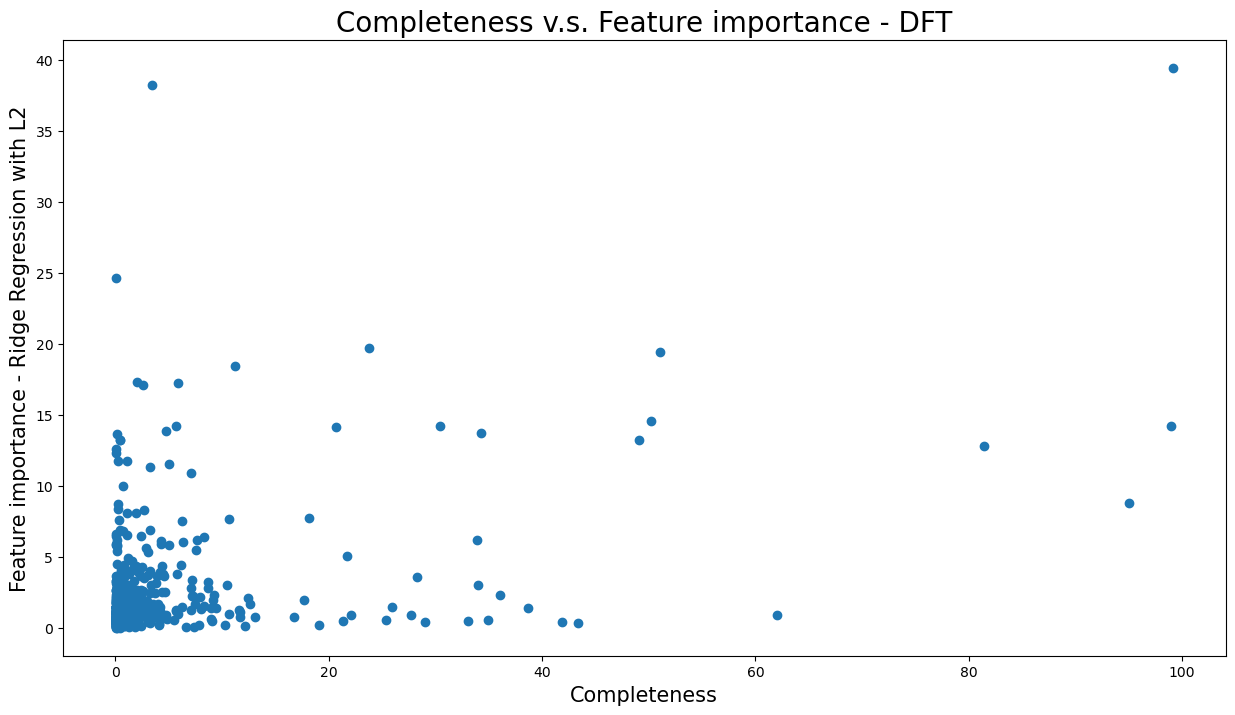

In [40]:
fig,ax = plt.subplots(figsize = (15, 8)) 
ax.scatter(completeness, fea_importance) 
plt.title('Completeness v.s. Feature importance - DFT', fontsize = 20)
plt.xlabel('Completeness', fontsize = 15)
plt.ylabel('Feature importance - Ridge Regression with L2', fontsize = 15)
plt.show()

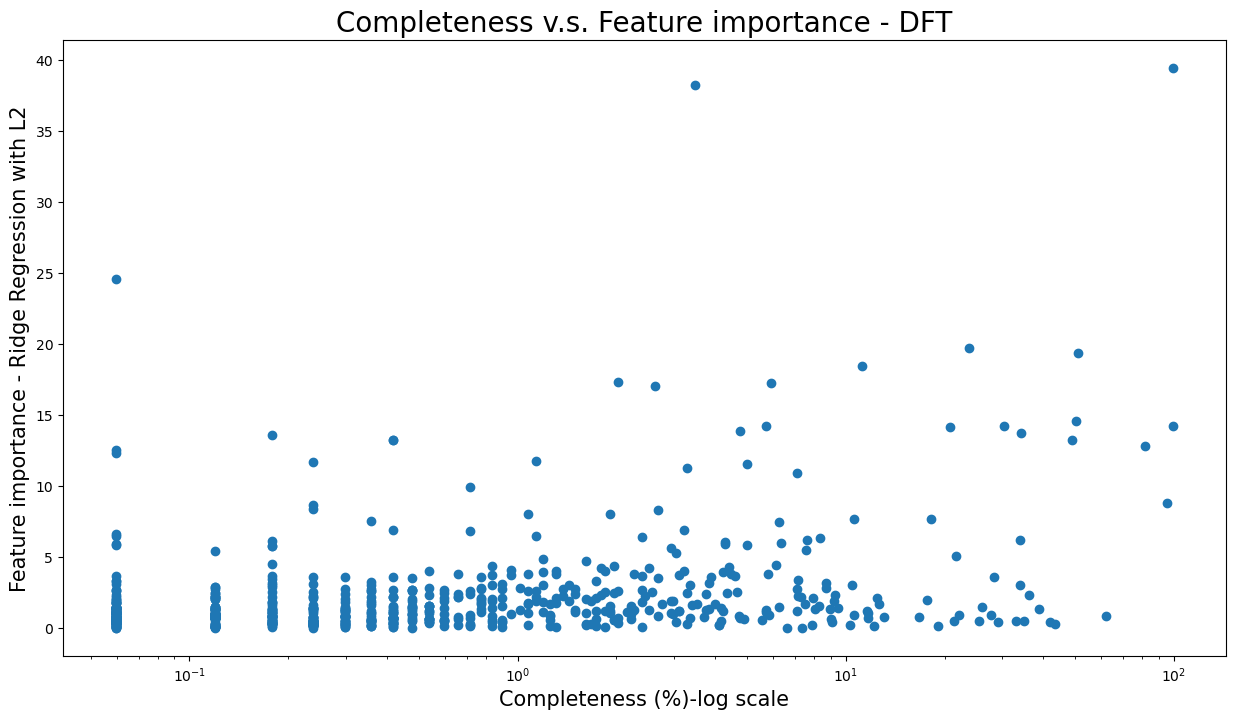

In [41]:
fig,ax = plt.subplots(figsize = (15, 8)) 
#scale x-axis to see if it results in better visualization
ax.set_xscale('log')
ax.scatter(completeness, fea_importance) 
plt.title('Completeness v.s. Feature importance - DFT', fontsize = 20)
plt.xlabel('Completeness (%)-log scale', fontsize = 15)
plt.ylabel('Feature importance - Ridge Regression with L2', fontsize = 15)
plt.show()

### Obseravtions:
I did both log-scaled x_axis and the originl plot, and found there are still some features with low completeness seem to be important, but most of the others have quite small values on feature importance. Similarly, the features with higher completeness show higher values on feature importance overall.